# Using MACD and RSI together

## MACD and RSI - Separate Strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [2]:
pd.read_csv("../original/forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [3]:
symbol = "EURUSD=X"

__MACD__

In [6]:
import sys
print(sys.path)

['/Users/vadim/Projects/Udemy/finance/technical-analysis/Section_10', '/Users/vadim/.pyenv/versions/3.10.5/lib/python310.zip', '/Users/vadim/.pyenv/versions/3.10.5/lib/python3.10', '/Users/vadim/.pyenv/versions/3.10.5/lib/python3.10/lib-dynload', '', '/Users/vadim/Projects/Udemy/finance/technical-analysis/venv/lib/python3.10/site-packages', '/Users/vadim/Projects/Udemy/finance/technical-analysis/Section_08']


In [17]:
# Add MACDBacktester to Python Path
#

this_folder_abs = sys.path[0].split('/')
this_folder_abs.pop()
Section_08_abs_path = "/".join(this_folder_abs) + "/Section_08"
Section_08_abs_path
if Section_08_abs_path not in sys.path:
    sys.path.append(Section_08_abs_path)
    
# Add RSIBacktester to Python Path
#

this_folder_abs = sys.path[0].split('/')
this_folder_abs.pop()
Section_09_abs_path = "/".join(this_folder_abs) + "/Section_09"
Section_09_abs_path
if Section_09_abs_path not in sys.path:
    sys.path.append(Section_09_abs_path)

print(sys.path)

['/Users/vadim/Projects/Udemy/finance/technical-analysis/Section_10', '/Users/vadim/.pyenv/versions/3.10.5/lib/python310.zip', '/Users/vadim/.pyenv/versions/3.10.5/lib/python3.10', '/Users/vadim/.pyenv/versions/3.10.5/lib/python3.10/lib-dynload', '', '/Users/vadim/Projects/Udemy/finance/technical-analysis/venv/lib/python3.10/site-packages', '/Users/vadim/Projects/Udemy/finance/technical-analysis/Section_08', '/Users/vadim/Projects/Udemy/finance/technical-analysis/Section_09']


In [9]:
from MACDBacktester import MACDBacktester as MACD

In [10]:
ptc = 0.00007

In [11]:
tester = MACD(symbol, EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [12]:
tester.test_strategy()

(0.416605, -0.458123)

In [13]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

(array([18., 30., 19.]), 0.760579)

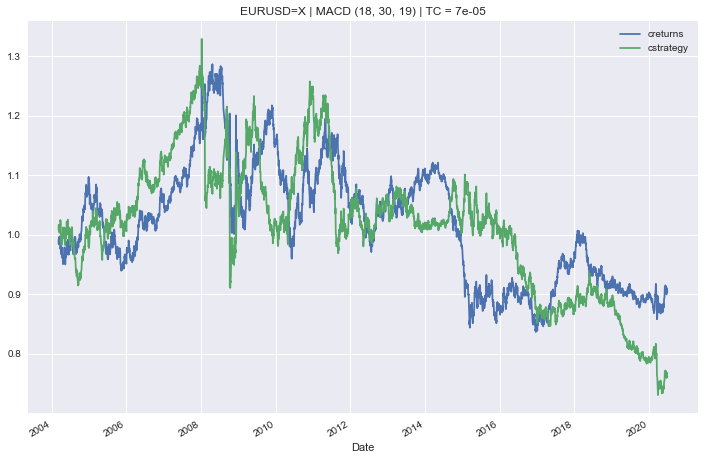

In [14]:
tester.plot_results()

In [15]:
macd = tester.results
macd

,price,returns,EMA_S,EMA_L,MACD,MACD_Signal,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,
2004-03-09,1.231906,-0.008648,1.245075,1.250107,-0.005032,-0.002042,-1,0.008648,0.0,0.991389,1.008686
2004-03-10,1.223197,-0.007095,1.242763,1.248307,-0.005544,-0.002435,-1,0.007095,0.0,0.984380,1.015868
2004-03-11,1.235102,0.009686,1.241954,1.247426,-0.005472,-0.002772,-1,-0.009686,0.0,0.993960,1.006076
2004-03-12,1.222404,-0.010334,1.239890,1.245759,-0.005870,-0.003112,-1,0.010334,0.0,0.983742,1.016527
2004-03-15,1.227205,0.003919,1.238551,1.244526,-0.005976,-0.003423,-1,-0.003919,0.0,0.987605,1.012550
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.122109,1.115986,0.006123,0.005332,1,0.002892,0.0,0.910372,0.768002
2020-06-25,1.125087,-0.005449,1.122422,1.116573,0.005849,0.005384,1,-0.005449,0.0,0.905425,0.763829
2020-06-26,1.122208,-0.002562,1.122400,1.116937,0.005463,0.005392,1,-0.002562,0.0,0.903108,0.761874


__RSI__

In [18]:
from RSIBacktester import RSIBacktester as RSI

In [19]:
tester = RSI(symbol, periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [20]:
tester.test_strategy()

(1.527501, 0.62353)

In [21]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1)) # higher volatility

(array([ 6., 65., 20.]), 2.582989)

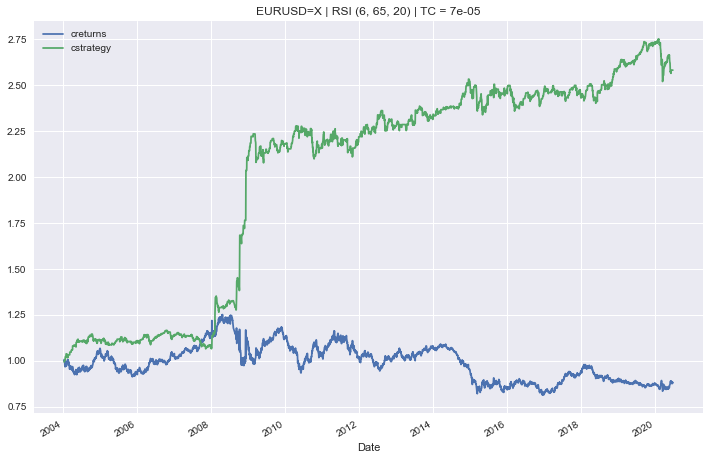

In [22]:
tester.plot_results()

In [23]:
rsi = tester.results
rsi

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
2004-01-09,1.285892,0.006549,0.008394,0.000000,0.005951,0.001335,81.680965,-1.0,-0.006549,0.0,1.006571,0.993472
2004-01-12,1.274096,-0.009216,0.000000,0.011796,0.005951,0.003301,64.323541,0.0,0.009146,1.0,0.997337,1.002600
2004-01-13,1.278593,0.003523,0.004496,0.000000,0.004950,0.003301,59.994269,0.0,0.000000,0.0,1.000857,1.002600
2004-01-14,1.265102,-0.010607,0.000000,0.013490,0.004382,0.005549,44.125849,0.0,-0.000000,0.0,0.990297,1.002600
2004-01-15,1.260097,-0.003965,0.000000,0.005006,0.004382,0.005049,46.467206,0.0,-0.000000,0.0,0.986378,1.002600
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.002246,0.002670,45.695372,0.0,0.000000,0.0,0.885508,2.582989
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.002246,0.002494,47.393107,0.0,-0.000000,0.0,0.880696,2.582989
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002246,0.002593,46.415685,0.0,-0.000000,0.0,0.878442,2.582989


## Combination

In [24]:
comb = macd.loc[:, ["returns", "position"]].copy()

In [25]:
comb

,returns,position
Date,,
2004-03-09,-0.008648,-1
2004-03-10,-0.007095,-1
2004-03-11,0.009686,-1
2004-03-12,-0.010334,-1
2004-03-15,0.003919,-1
...,...,...
2020-06-24,0.002892,1
2020-06-25,-0.005449,1
2020-06-26,-0.002562,1


In [26]:
comb.rename(columns = {"position":"position_MACD"}, inplace = True)

In [27]:
comb["position_RSI"] = rsi.position.astype("int")

In [28]:
comb

,returns,position_MACD,position_RSI
Date,,,
2004-03-09,-0.008648,-1,0
2004-03-10,-0.007095,-1,0
2004-03-11,0.009686,-1,0
2004-03-12,-0.010334,-1,0
2004-03-15,0.003919,-1,0
...,...,...,...
2020-06-24,0.002892,1,0
2020-06-25,-0.005449,1,0
2020-06-26,-0.002562,1,0


In [29]:
comb["position_comb"] = np.where(comb.position_MACD == comb.position_RSI, comb.position_MACD, 0)

In [30]:
comb.position_comb.value_counts()

 0    3814
-1     306
 1     107
Name: position_comb, dtype: int64

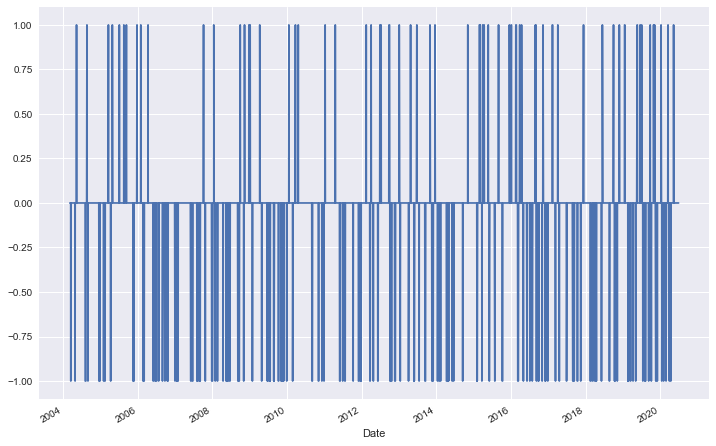

In [31]:
comb.position_comb.plot(figsize = (12, 8))
plt.show()

In [32]:
comb["strategy"] = comb["position_comb"].shift(1) * comb["returns"]

In [33]:
comb

,returns,position_MACD,position_RSI,position_comb,strategy
Date,,,,,
2004-03-09,-0.008648,-1,0,0,NaN
2004-03-10,-0.007095,-1,0,0,-0.0
2004-03-11,0.009686,-1,0,0,0.0
2004-03-12,-0.010334,-1,0,0,-0.0
2004-03-15,0.003919,-1,0,0,0.0
...,...,...,...,...,...
2020-06-24,0.002892,1,0,0,0.0
2020-06-25,-0.005449,1,0,0,-0.0
2020-06-26,-0.002562,1,0,0,-0.0


In [34]:
comb.dropna(inplace=True)

In [35]:
comb["trades"] = comb.position_comb.diff().fillna(0).abs()

In [36]:
comb.strategy = comb.strategy - comb.trades * ptc

In [37]:
comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)

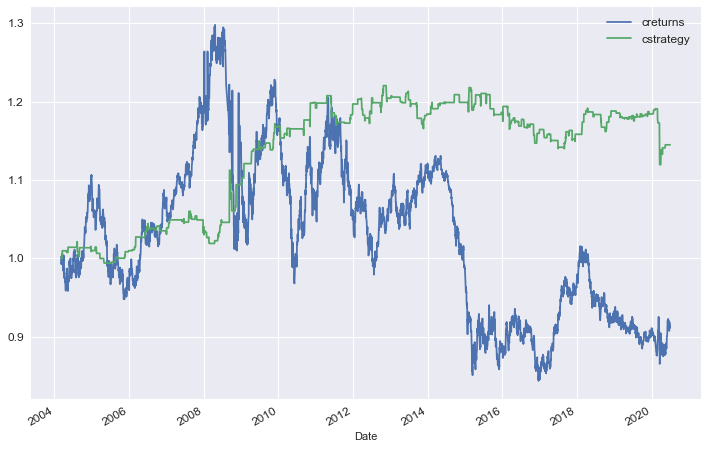

In [38]:
comb[["creturns", "cstrategy"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()